# PLAN_89_FINAL_DATA_ANALYSIS

## Please import all the packages needed :)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
import numpy as np
plt.style.use(['science', 'grid'])

## Loading all the data into Proper Pandas Data Frames

In [6]:
drinking_data_path = "./DrinkingData.xlsm"
boarding_data_path = "./BoardingData.xlsm"

boarding_data = pd.ExcelFile(boarding_data_path)
drinking_data = pd.ExcelFile(drinking_data_path)

In [7]:
# We will now load the sheets into DF's
boarding_df_raw = boarding_data.parse('survey_0')
drinking_df_raw = drinking_data.parse('survey_0')

# Change some of the names so we can avoid typing that much 
boarding_df = boarding_df_raw.rename(
    columns={
        "How many individuals boarded?": "Boarded", 
        "How many individuals got off?": "Left", 
    }
)
drinking_df = drinking_df_raw.rename(
    columns={
        "Have you consumed alcohol tonight?": "Alcohol", 
        "Where are you going?": "Destination",
        "What is your gender identity?": "Gender",
        "If the P2P didn\'t exist, how would you be traveling to your destination tonight?": "AlternativeTransport",
    }
)

## Data Analysis

### How busy is the P2P?

([<matplotlib.axis.XTick at 0x158c273e0>,
 [Text(0, 0, '$\\mathdefault{0}$'),
  Text(1, 0, '$\\mathdefault{1}$'),
  Text(2, 0, '$\\mathdefault{2}$'),
  Text(3, 0, '$\\mathdefault{3}$'),
  Text(4, 0, '$\\mathdefault{4}$'),
  Text(5, 0, '$\\mathdefault{5}$'),
  Text(6, 0, '$\\mathdefault{6}$'),
  Text(7, 0, '$\\mathdefault{7}$'),
  Text(8, 0, '$\\mathdefault{8}$'),
  Text(9, 0, '$\\mathdefault{9}$'),
  Text(10, 0, '$\\mathdefault{10}$'),
  Text(11, 0, '$\\mathdefault{11}$'),
  Text(12, 0, '$\\mathdefault{12}$'),
  Text(13, 0, '$\\mathdefault{13}$'),
  Text(14, 0, '$\\mathdefault{14}$'),
  Text(15, 0, '$\\mathdefault{15}$'),
  Text(16, 0, '$\\mathdefault{16}$'),
  Text(17, 0, '$\\mathdefault{17}$'),
  Text(18, 0, '$\\mathdefault{18}$'),
  Text(19, 0, '$\\mathdefault{19}$'),
  Text(20, 0, '$\\mathdefault{20}$'),
  Text(21, 0, '$\\mathdefault{21}$'),
  Text(22, 0, '$\\mathdefault{22}$'),
  Text(23, 0, '$\\mathdefault{23}$')])

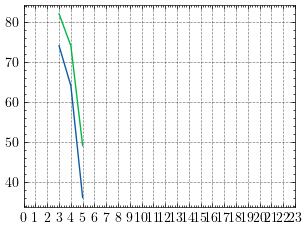

In [ ]:
boarding_df["CreationDate"] = pd.to_datetime(boarding_df['CreationDate'])
boarding_df['Hour'] = boarding_df["CreationDate"].dt.hour
boarding_time_group = boarding_df.groupby("Hour")[['Boarded', 'Left']].sum()

plt.plot(boarding_time_group.index, boarding_time_group)
plt.xticks(range(0,24))

### How many drank?

In [9]:
drinking_summary = drinking_df['Alcohol'].value_counts()
drinking_summary

Alcohol
No                      90
Yes                     42
Prefer not to answer    11
Name: count, dtype: int64

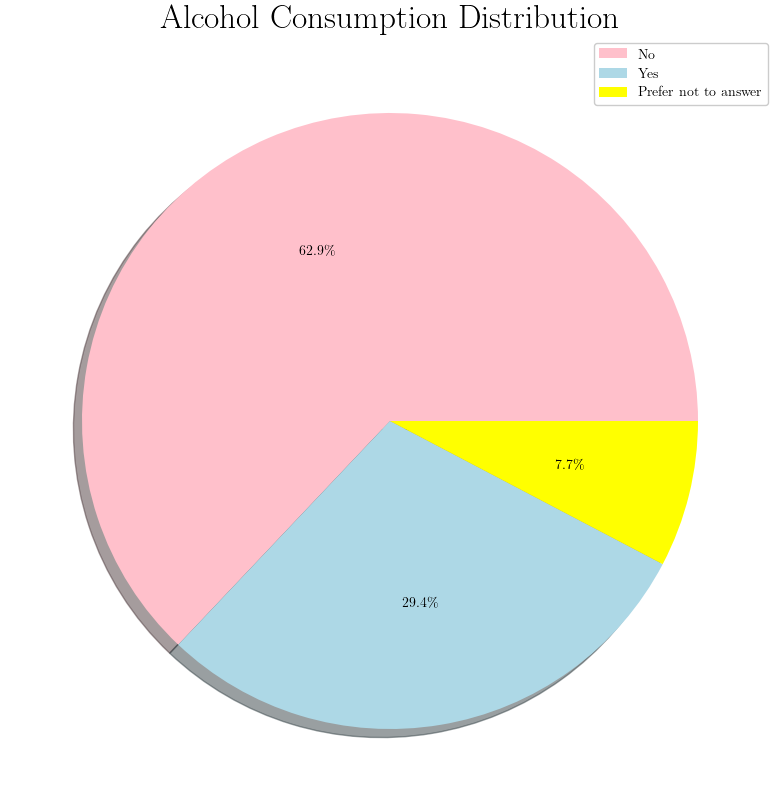

In [47]:
drinking_counts = drinking_df["Alcohol"].value_counts()
plt.figure(figsize=(10,10))
plt.pie(drinking_counts, colors=['pink', 'lightblue', 'yellow', 'green', "purple", 'orange', 'lightgreen' ], autopct='%1.1f%%', shadow=True)
plt.title("Alcohol Consumption Distribution", fontsize=24)
plt.legend(drinking_counts.index,loc = "best")

### Who plans on drinking?

In [46]:
drinking_anticipation_summary = drinking_df["Do you plan on drinking alcohol sometime tonight?"].value_counts()
drinking_anticipation_summary

Do you plan on drinking alcohol sometime tonight?
No                      81
Yes                     33
Unsure                  20
Prefer not to answer     8
Name: count, dtype: int64

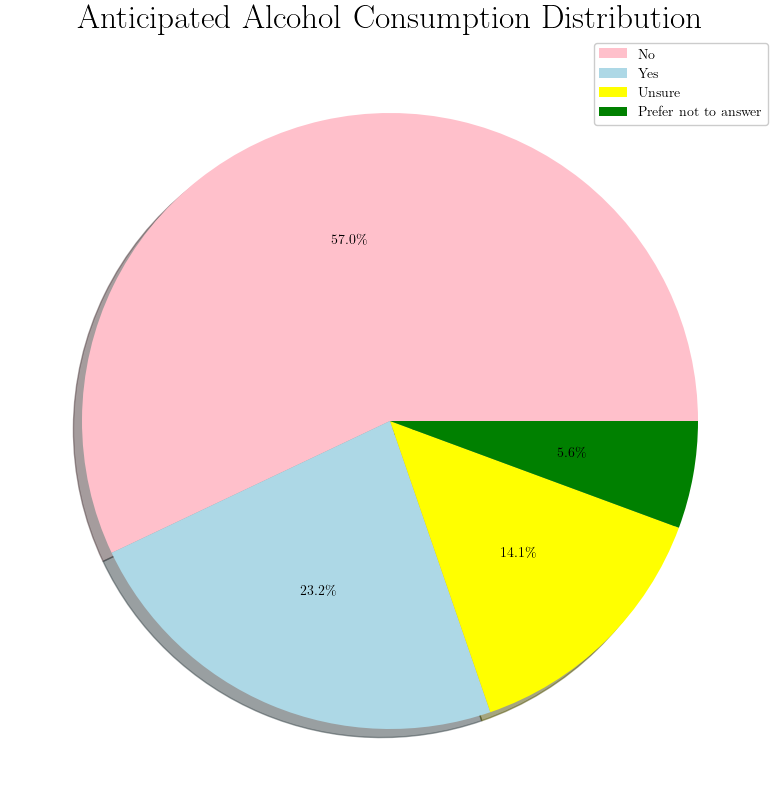

In [49]:
drinking_anticipation_counts = drinking_df["Do you plan on drinking alcohol sometime tonight?"].value_counts()
plt.figure(figsize=(10,10))
plt.pie(drinking_anticipation_counts, colors=['pink', 'lightblue', 'yellow', 'green', "purple", 'orange', 'lightgreen' ], autopct='%1.1f%%', shadow=True)
plt.title("Anticipated Alcohol Consumption Distribution", fontsize=24)
plt.legend(drinking_anticipation_counts.index,loc = "best") 

### What are their alternative way of transportation

In [10]:
drinking_df["AlternativeTransport"].value_counts()

AlternativeTransport
Walk                          103
Uber/Lyft/Other Ride Share     16
Bike                            4
Prefer not to answer            4
Not go out                      3
other                           3
Car                             2
Name: count, dtype: int64

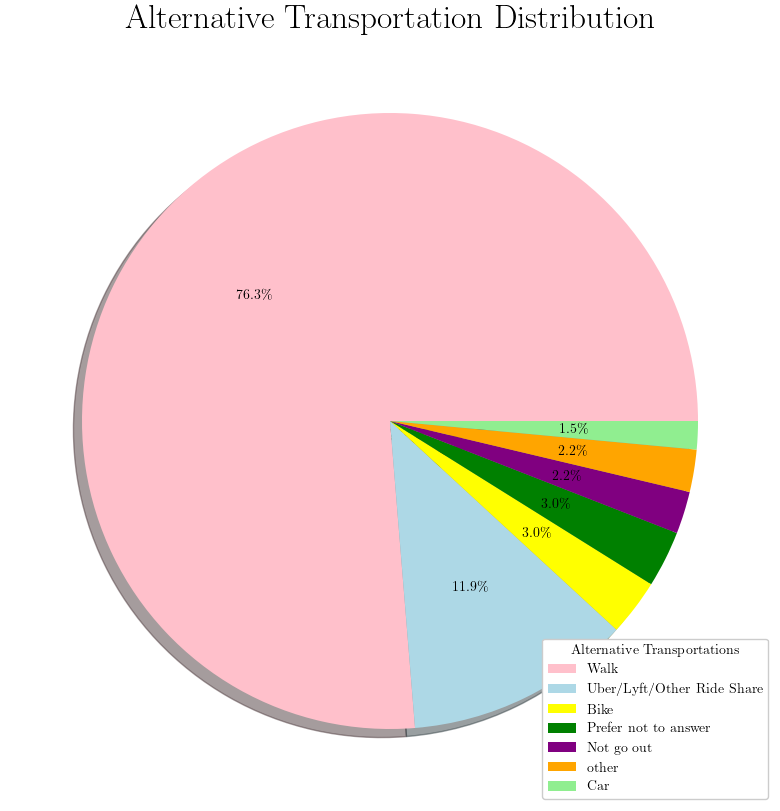

In [51]:
alternative_counts = drinking_df["AlternativeTransport"].value_counts()
plt.figure(figsize=(10,10))
plt.pie(alternative_counts, colors=['pink', 'lightblue', 'yellow', 'green', "purple", 'orange', 'lightgreen' ], autopct='%1.1f%%', shadow=True)
plt.title("Alternative Transportation Distribution", fontsize=24)
plt.legend(alternative_counts.index, title = "Alternative Transportations" ,loc = "best")

### Gender

In [11]:
drinking_df.Gender.value_counts()  # Fun alternative way of using it:)

Gender
Cis-Female              80
Cis-Male                38
Transgender              5
Prefer not to answer     4
other                    2
Name: count, dtype: int64

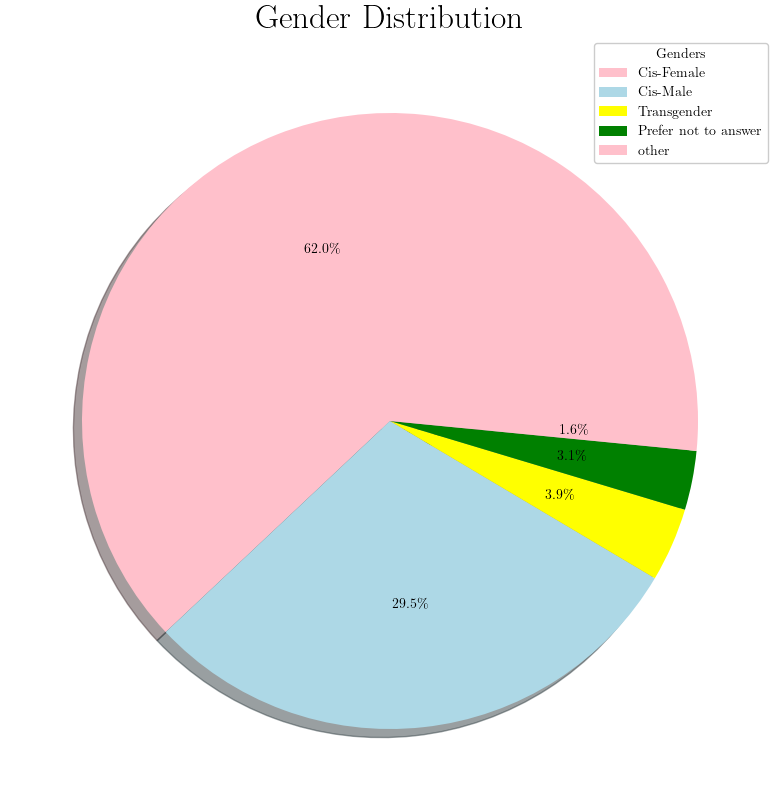

In [30]:
gender_counts = drinking_df["Gender"].value_counts()
plt.figure(figsize=(10,10))
plt.pie(gender_counts, colors=['pink', 'lightblue', 'yellow', 'green'], autopct='%1.1f%%', shadow=True)
plt.title("Gender Distribution", fontsize=24)
plt.legend(gender_counts.index, title = "Genders", loc = "best")


* It much be noted that there were individuals who played pranks when entering section above

### Where are they going?

In [13]:
drinking_df["Destination"].value_counts()

Destination
Dorm/Back home          56
other                   47
Frat                    18
House Party              9
Prefer not to answer     6
Work                     1
Name: count, dtype: int64

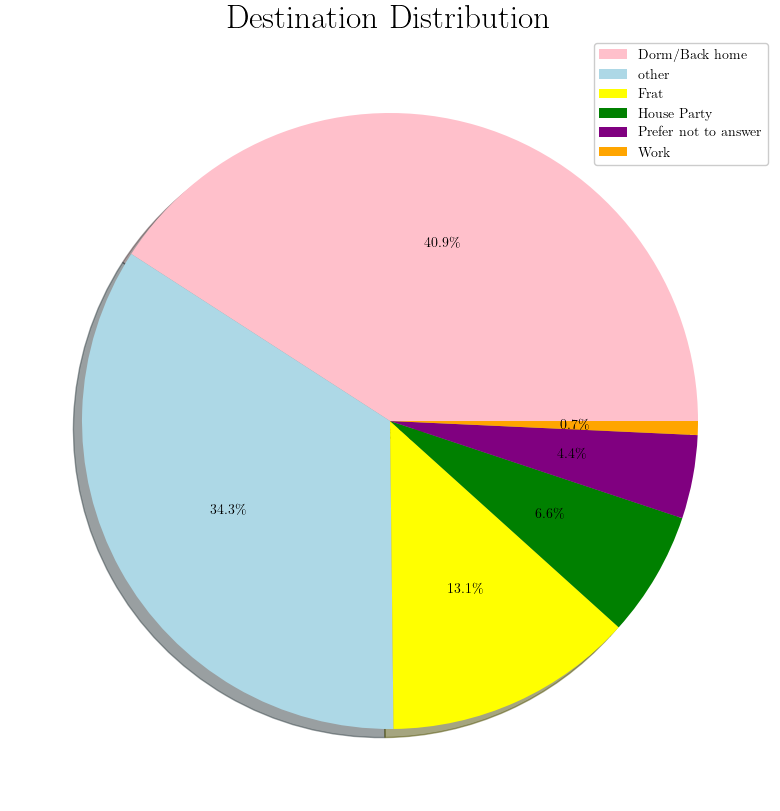

In [52]:
destination_count = drinking_df["Destination"].value_counts()
plt.figure(figsize=(10,10))
plt.pie(destination_count, shadow= True, autopct = '%1.1f%%',colors=['pink', 'lightblue', 'yellow', 'green', "purple", 'orange', 'lightgreen' ])
plt.legend(destination_count.index)
plt.title("Destination Distribution", fontsize = 24)
plt.show()

### (Now this need some work!) How much have you drank?

In [14]:
drinking_df["If yes, how much have you had?"].value_counts()

If yes, how much have you had?
1 shot                                                                2
3 drinks                                                              2
1 drink                                                               2
2 drinks                                                              2
0                                                                     1
4 sips                                                                1
A beer                                                                1
14 beers                                                              1
Like 7 drinks and a zyn👍😐                                             1
1 million cocks                                                       1
1 surge                                                               1
Three sips                                                            1
2 shots                                                               1
3 drinks at 5% alc each          

We need manual conversion here, nothing better to do :(